In [2]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

import scipy.interpolate

In [3]:
kvec = np.logspace(-4,np.log10(3),30)
print(kvec)
uni1 = Class() 
# "H0":67.7
h = 0.6704
dict_uni1 = {"gauge":"sync",
             "h":h,
             #"N_ur": 2.03351,"N_ncdm": 1,"m_ncdm": 10.06,
            #"Omega_b":0.07,"Omega_cdm":0.252, 
            'k_output_values':str(kvec).strip('[]'),
            "z_pk":'1000.0, 0.0',
             'P_k_max_1/Mpc':3.0,
            'output':'pCl,lCl,mPk,tCl, dTk, vTk',
            "lensing":"yes"
           }
uni1.set(dict_uni1)
uni1.compute()

[1.00000000e-04 1.42686699e-04 2.03594941e-04 2.90502902e-04
 4.14509002e-04 5.91449212e-04 8.43919359e-04 1.20416068e-03
 1.71817712e-03 2.45161022e-03 3.49812171e-03 4.99135440e-03
 7.12199884e-03 1.01621451e-02 1.45000294e-02 2.06896133e-02
 2.95213263e-02 4.21230060e-02 6.01039269e-02 8.57603094e-02
 1.22368555e-01 1.74603652e-01 2.49136187e-01 3.55484202e-01
 5.07228675e-01 7.23747853e-01 1.03269192e+00 1.47351402e+00
 2.10250851e+00 3.00000000e+00]


In [4]:

bg = uni1.get_background()
da = 3
pb = uni1.get_perturbations()["scalar"]
pb[0].keys()


dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm'])

In [6]:
z = 0
tranf = uni1.get_transfer(z)
d_cdm = tranf["d_m"]
k_tranf = tranf['k (h/Mpc)'] 
prim = uni1.get_primordial()['P_scalar(k)']
k_prim = uni1.get_primordial()['k [1/Mpc]']
#print(f"{k_prim=}")
#print(f"{k_tranf*h=}")

30


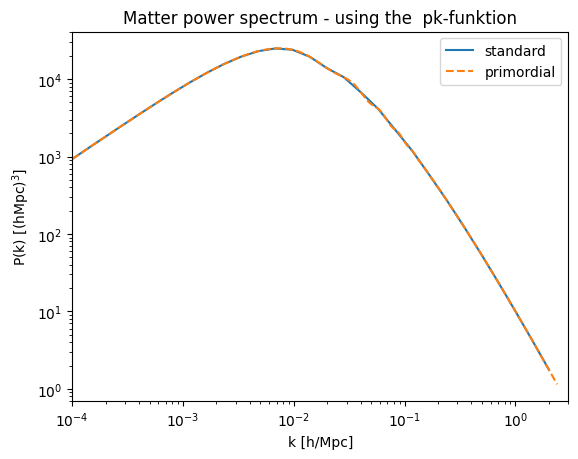

In [7]:
z = 0
print(len(kvec))
power_array = np.zeros(len(kvec))
for k_ind, k_value in enumerate(kvec):
    pk = uni1.pk(k_value,z)
    power_array[k_ind] = pk
    
tranf = uni1.get_transfer(z)
d_cdm = tranf["d_m"]
k_tranf = tranf['k (h/Mpc)'] * h
prim = uni1.get_primordial()['P_scalar(k)']
k_prim = uni1.get_primordial()['k [1/Mpc]']
prim_interp =  scipy.interpolate.interp1d(k_prim, prim, fill_value="extrapolate",kind="cubic")
#print(f"{k_prim=}")
#print(f"{k_tranf=}")
prim_tranf = prim_interp(k_tranf)
d_cdm = tranf["d_m"]
#plotte del
plt.loglog(kvec*h,power_array * h**(3),label="standard")
plt.loglog(k_tranf*h,2*np.pi**2 * d_cdm**2 * k_tranf **(-3) *prim_tranf * h**3,"--", label="primordial" )
plt.xlim( kvec[0] , kvec[-1])
plt.title("Matter power spectrum - using the  pk-funktion")
plt.xlabel("k [h/Mpc]")
plt.ylabel(r"P(k) [(hMpc)$^3$]")
plt.legend()

https://en.wikipedia.org/wiki/File:Planck_2018_Linear_Matter_Power_Spectrum.pdf
for sammenligning